In [1]:
import matplotlib.pyplot as plt
import torch

import algorithm
from childnet import ChildNetwork
from cifar10_training import Cifar10Trainer

outer_iterations = 100
controller_iterations = 250
child_iterations = 400
hidden_size = 100
num_layer_types = 4
num_filters = 32
num_classes = 10
batch_size = 128
##
num_of_steps_for_full_training = 17550
max_num_of_best_samples = 3
max_hidden_layer_increase = 3
val_accuracies_for_plotting = torch.zeros(max_hidden_layer_increase + 1, max_num_of_best_samples)

# check val accuracy for different number of hidden layers
start_num_hidden_layer = 2
for i in range(start_num_hidden_layer, start_num_hidden_layer + max_hidden_layer_increase + 1):
    print("Find best samples for {} hidden layers".format(i))
    best_samples = algorithm.run(outer_iterations=outer_iterations, controller_iterations=controller_iterations,
                                 child_iterations=child_iterations, hidden_size=hidden_size,
                                 num_layer_types=num_layer_types,
                                 num_layers=i, num_filters=num_filters, num_classes=num_classes, batch_size=batch_size,
                                 max_num_of_best_samples=max_num_of_best_samples)
    z = 0
    for architecture in list(best_samples.values()):
        z += 1
        print('training best architecture number {} till convergence'.format(z))
        (layers_types, skip_connections) = architecture
        child_net = ChildNetwork(layers_types, skip_connections, load_previous_network_weights=False,
                                 num_hidden_layers=i,
                                 num_filters=num_filters, num_classes=num_classes)
        cifar10_trainer = Cifar10Trainer(batch_size=batch_size)
        print('layer types', layers_types)
        print('skip connection', skip_connections)
        val_accuracy, _ = cifar10_trainer.train(child_net, num_of_steps=num_of_steps_for_full_training, saving_weights=False)
        print('validation accuracy of this architecture is ', val_accuracy)
        val_accuracies_for_plotting[i - start_num_hidden_layer, z - 1] = val_accuracy
        print('#########')
        print('#########')
    print('############################')
    print('############################')



Find best samples for 2 hidden layers
what is the device? cpu or gpu ?  cuda
Files already downloaded and verified
Files already downloaded and verified
ITERATION NUMBER 1
Controller is sampling architecture...
tensor([[[0.2370, 0.2529, 0.2596, 0.2504]],

        [[0.2360, 0.2523, 0.2601, 0.2516]],

        [[0.2361, 0.2520, 0.2602, 0.2516]],

        [[0.2389, 0.2506, 0.2578, 0.2527]]], grad_fn=<ExpBackward>)
tensor([[[0., 0., 0., 1.]],

        [[0., 0., 0., 0.]],

        [[0., 0., 0., 1.]],

        [[0., 0., 0., 0.]]])
Creating new child network...
Training child network...
The training time for 400 steps is: 21.29 seconds
The validation time on whole validation set is 0.81 seconds
The validation set accuracy of the sampled network is: 34.28 %
Saving child network's weights...
Training controller network
The time for training the controller for 250 steps is: 6.66 seconds
total time of 1 outer iteration is 30.74
##############################################
#######################

Text(0, 0.5, 'validation accuracy on chosen architecture')

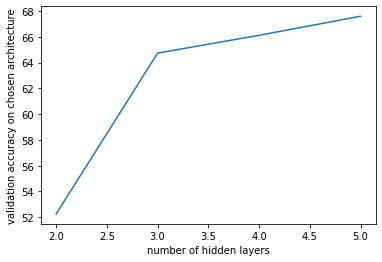

In [2]:
y, _ = torch.max(val_accuracies_for_plotting, 1)
plt.plot(range(start_num_hidden_layer, start_num_hidden_layer + max_hidden_layer_increase + 1), y)
plt.xlabel('number of hidden layers')
plt.ylabel('validation accuracy on chosen architecture')


In [4]:
print(y)

tensor([52.2600, 64.7400, 66.1200, 67.6000])
